In [1]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

## Linear Models

#### Linear regression aka ordinary least squares

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=60)

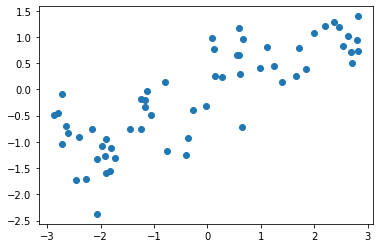

In [3]:
plt.scatter(X, y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
#학습된 LR

In [7]:
# check the learned parameters
print("lr.coef_:", lr.coef_) # this is w1  #input변수가 하나여서 하나 나온것임.
print("lr.intercept_:", lr.intercept_) # this is w0 = b

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


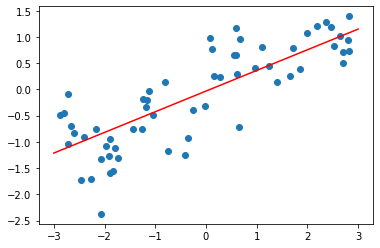

In [8]:
# y= -0.0318 + 0.3939x
plt.scatter(X, y)
x_points = range(-3,4)
plt.plot(x_points, lr.coef_*x_points + lr.intercept_, c='red' )

In [9]:
y_train_hat = lr.predict(X_train)
print(y_train)
print(y_train_hat)

[ 0.26134393  0.29262945 -0.70117304 -1.7113156  -1.32035898  1.19812891
 -0.74646948  0.95081838 -1.03731593  0.79900059 -1.7240941  -0.94575843
  0.97923163  0.44971554 -0.72142625 -1.11948406 -0.32691082 -0.38575444
  0.82614241  1.39515571 -0.83684971  1.28948157 -0.32309571 -0.9139074
 -0.08137001 -0.75150632  0.50015912 -0.75240909  0.13772889  0.77613985
 -0.93416482  0.38109799  0.13368988 -1.58831973 -0.48647165 -0.17851354
 -1.25635546 -0.49131681  0.96250584  1.20319981 -0.44713127 -1.27708305
  0.65823236  0.25092544  0.81263817]
[ 0.02670583  0.20717424 -1.07624425 -0.92509177 -0.84478135  0.93559713
 -0.52522035  1.06868591 -1.10662932  0.64219002 -1.00437487 -0.78005667
  0.0018378   0.45996132  0.22237074 -0.74160533 -0.49446475 -0.13563001
  0.96526728  1.07879625 -1.05977589  0.90134377 -0.04320339 -0.98267947
 -1.10373854 -0.60191177  1.03342886 -0.88383656  0.51649787  0.01562509
 -0.17324993  0.69707222 -0.34764921 -0.77662982 -1.16487092 -0.5230566
 -0.19264775 -0

In [10]:
y_test_hat = lr.predict(X_test)
print(y_test)
print(y_test_hat)

[-1.18073311 -2.37364735 -0.19612826  0.40012342 -1.30838148  0.65213403
  0.70945882  0.23938228  1.0738403  -1.54664568 -0.02565504  0.73141352
 -1.0767626   1.17396178  1.01581268]
[-0.3283204  -0.84483835 -0.49358667  0.35230624 -0.71167167  0.19957573
  1.02910669  0.07859229  0.75390167 -0.75032857 -0.47681266  1.07802761
 -0.8104986   0.2013684   1.00692209]


In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('performance for TRAIN--------')
print('train MAE : ', mean_absolute_error(y_train, y_train_hat))
print('train RMSE : ', mean_squared_error(y_train, y_train_hat)**0.5) ##  mse 계산 후, 0.5승 한것임.
print('train R_square : ', r2_score(y_train, y_train_hat))

print('performance for TEST--------')
print('test MAE : ', mean_absolute_error(y_test, y_test_hat))
print('test RMSE : ', mean_squared_error(y_test, y_test_hat)**0.5)
print('test R_square : ', r2_score(y_test, y_test_hat))

performance for TRAIN--------
train MAE :  0.41817049416555185
train RMSE :  0.5058856163340809
train R_square :  0.6700890315075756
performance for TEST--------
test MAE :  0.4945319104199025
test RMSE :  0.628257471416562
test R_square :  0.65933685968637


#### linear regression on extended_boston dataset

In [68]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape, y.shape)

(506, 104) (506,)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [70]:
lr = LinearRegression() #객체를 만들고 , fit
lr.fit(X_train, y_train) # same as LinearRegression().fit(X_train, y_train)

LinearRegression()

In [71]:
y_train_hat = lr.predict(X_train)
y_test_hat = lr.predict(X_test)

print('performance for TRAIN--------')
print('train MAE : ', mean_absolute_error(y_train, y_train_hat))
print('train RMSE : ', mean_squared_error(y_train, y_train_hat)**0.5)
print('train R_square : ', r2_score(y_train, y_train_hat))

print('performance for TEST--------')
print('test MAE : ', mean_absolute_error(y_test, y_test_hat))
print('test RMSE : ', mean_squared_error(y_test, y_test_hat)**0.5)
print('test R_square : ', r2_score(y_test, y_test_hat))

performance for TRAIN--------
train MAE :  1.5674141791450378
train RMSE :  2.022464489810331
train R_square :  0.952051960903273
performance for TEST--------
test MAE :  3.2258952120185795
test RMSE :  5.662961691692917
test R_square :  0.6074721959665951


Is this result good enough? overfitting or underfitting?
-overfitting에 해당하는 예시다.

##### Ridge regression

In [72]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [73]:
y_train_hat = ridge.predict(X_train)
y_test_hat = ridge.predict(X_test)

print('performance for TRAIN--------')
print('train MAE : ', mean_absolute_error(y_train, y_train_hat))
print('train RMSE : ', mean_squared_error(y_train, y_train_hat)**0.5)
print('train R_square : ', r2_score(y_train, y_train_hat))

print('performance for TEST--------')
print('test MAE : ', mean_absolute_error(y_test, y_test_hat))
print('test RMSE : ', mean_squared_error(y_test, y_test_hat)**0.5)
print('test R_square : ', r2_score(y_test, y_test_hat))

performance for TRAIN--------
train MAE :  2.16563966712368
train RMSE :  3.1212954928561008
train R_square :  0.8857966585170941
performance for TEST--------
test MAE :  2.962692600141009
test RMSE :  4.494283317645136
test R_square :  0.7527683481744758


Compare it with the LinearRegression results. Which one is better?
- Ridge가 train에 대해서는 낮지만, test에 대해서는 높아짐. test셋에 대하여 정확도가 더 높으므로
generalization 성능이 더 좋다는 것이므로 Ridge가 더 좋은 모델이다.

#### varying the hyperparameter

In [74]:


training_r2 = []
test_r2 = []

alpha_settings = [0, 0.1, 1, 10]
for alpha in alpha_settings:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    y_train_hat = ridge.predict(X_train)
    training_r2.append(r2_score(y_train, y_train_hat))
    
    y_test_hat = ridge.predict(X_test)
    test_r2.append(r2_score(y_test, y_test_hat))

In [75]:
pd.DataFrame({"alpha":alpha_settings, "training R2": training_r2, "test R2": test_r2})

,alpha,training R2,test R2
0,0.0,0.950686,0.615277
1,0.1,0.928227,0.772207
2,1.0,0.885797,0.752768
3,10.0,0.788279,0.635941


0.1이 성능이 제일 좋음.

#### effect of the hyperparameter alpha on RidgeRegression

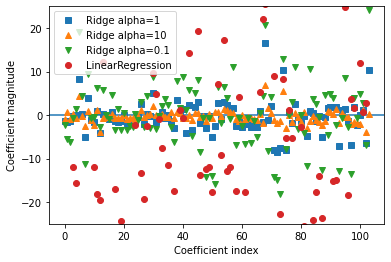

In [77]:
ridge = Ridge(alpha=1).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()  #알파의 크기가 커질수록, weight의 크기가 작아지는것을 확인할 수 있다.

##### Lasso

In [78]:
from sklearn.linear_model import Lasso

training_r2 = []
test_r2 = []
num_vars_used = []

alpha_settings = [0.0001, 0.001, 0.01, 0.1, 1]
for alpha in alpha_settings:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
    num_vars_used.append(sum(lasso.coef_ != 0)) #coef가 0이 아닌 것들의 개수를 기록. 예측에 활용되는 변수의 개수를 확인 할 수 있따.
    
    
    y_train_hat = lasso.predict(X_train)
    training_r2.append(r2_score(y_train, y_train_hat))
    
    y_test_hat = lasso.predict(X_test)
    test_r2.append(r2_score(y_test, y_test_hat))
# 32개 일 때가 성능이 제일 좋음.
pd.DataFrame({"alpha":alpha_settings, "training R2": training_r2, "test R2": test_r2, "variables used": num_vars_used})

C:\Users\choib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.9983395915598, tolerance: 3.2331821266490772
  model = cd_fast.enet_coordinate_descent(
C:\Users\choib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 777.8635616562752, tolerance: 3.2331821266490772
  model = cd_fast.enet_coordinate_descent(
C:\Users\choib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.902458003182346, tolerance: 3.2331821266490772
  model = cd_fast.enet_coordinate_descent(


,alpha,training R2,test R2,variables used
0,0.0001,0.942093,0.697654,100
1,0.0010,0.935459,0.754797,76
2,0.0100,0.896112,0.767800,32
3,0.1000,0.770996,0.630201,8
4,1.0000,0.293238,0.209375,4


C:\Users\choib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.902458003182346, tolerance: 3.2331821266490772
  model = cd_fast.enet_coordinate_descent(
C:\Users\choib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.9983395915598, tolerance: 3.2331821266490772
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'Coefficient magnitude')

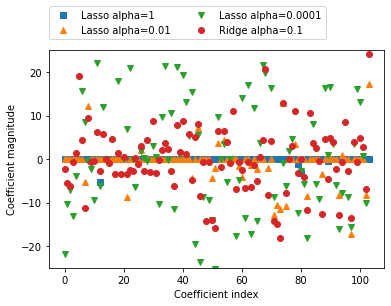

In [79]:
lasso = Lasso().fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=1000).fit(X_train, y_train)
lasso00001 = Lasso(alpha=0.0001, max_iter=1000).fit(X_train, y_train)

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

##### Logistic Regression

In [81]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

training_accuracy = []
test_accuracy = []

C_settings = [0.01, 0.1, 1, 10, 100, 1000, 10000]
for C in C_settings:
    logreg = LogisticRegression(C=C)
    logreg.fit(X_train, y_train)
    
    y_train_hat = logreg.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_train_hat))
    
    y_test_hat = logreg.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, y_test_hat))

C:\Users\choib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\choib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [84]:
#c값의 변화에 따른 성능 변화.
pd.DataFrame({"C":C_settings, "training accuracy": training_accuracy, "test accuracy": test_accuracy})

,C,training accuracy,test accuracy
0,0.01,0.934272,0.930070
1,0.10,0.936620,0.951049
2,1.00,0.946009,0.951049
3,10.00,0.948357,0.958042
4,100.00,0.943662,0.965035
5,1000.00,0.946009,0.958042
6,10000.00,0.946009,0.958042


C:\Users\choib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\choib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

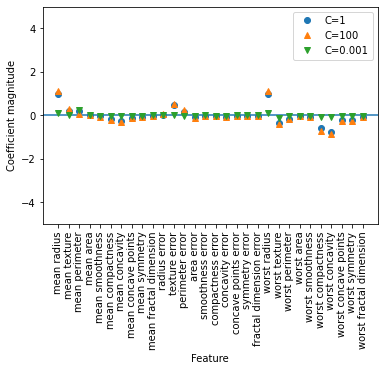

In [85]:
logreg = LogisticRegression().fit(X_train, y_train)
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

#c값이 커질수록, weight값이 커짐을 확인할 수 있다.

##### Linear models for multiclass classification

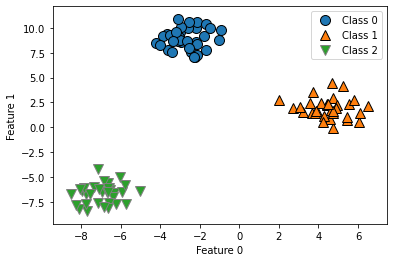

In [89]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [91]:
clf = LogisticRegression(multi_class='ovr')
clf.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [92]:
y_test_hat = clf.predict(X_test)
print(y_test_hat)
print(accuracy_score(y_test, y_test_hat))

[1 0 0 2 2 1 2 0 2 0 2 0 1 0 1 2 2 0 2 1 0 2 1 2 1]
1.0


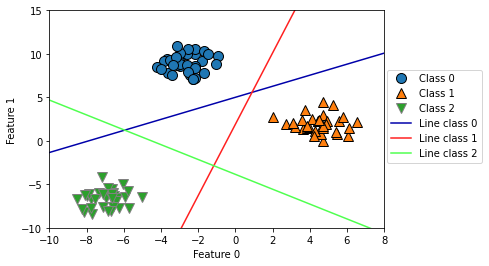

In [94]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(clf.coef_, clf.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))